In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mishraswag2804
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images


100%|██████████| 172M/172M [00:00<00:00, 1.09GB/s]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset , dataloader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
#GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device : {device}")

Using device : cuda


In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_dir = '/content/fracture-detection-using-x-ray-images/data/train'
val_dir = '/content/fracture-detection-using-x-ray-images/data/val'

In [ ]:
def flatten_images(directory, label):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.equalizeHist(img)
            img = cv2.resize(img, (128, 128))

            img = img / 255.0  # ✅ normalize pixel values to range 0–1
            img_flat = img.flatten()
            img_flat = np.append(img_flat, label)  # add label at the end
            data.append(img_flat)
    return data

In [ ]:
train_data = flatten_images(os.path.join(train_dir, 'fractured'), label=1) + \
              flatten_images(os.path.join(train_dir, 'not fractured'), label=0)
train_df = pd.DataFrame(train_data)

val_data = flatten_images(os.path.join(val_dir, 'fractured'), label=1) + \
            flatten_images(os.path.join(val_dir, 'not fractured'), label=0)
val_df = pd.DataFrame(val_data)







In [ ]:
combined_data = train_data + val_data
df = pd.DataFrame(combined_data)


In [ ]:
df.to_csv('/content/flattened_images.csv', header=False, index=False)
print("✅ Flattened CSV saved as 'flattened_images.csv'")


✅ Flattened CSV saved as 'flattened_images.csv'


In [ ]:
df = pd.read_csv('/content/flattened_images.csv', header=None)
print(df.shape)

(9463, 16385)


In [ ]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
5017,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.007843,0.003922,0.000000,...,0.000000,0.003922,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
7604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129412,0.427451,...,0.207843,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
92,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
5123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5778,0.321569,0.298039,0.372549,0.333333,0.298039,0.266667,0.309804,0.286275,0.352941,0.278431,...,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.007843,0.003922,0.003922,0.0
6040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.0


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
16380,0
16381,0
16382,0
16383,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Columns: 16385 entries, 0 to 16384
dtypes: float64(16385)
memory usage: 1.2 GB


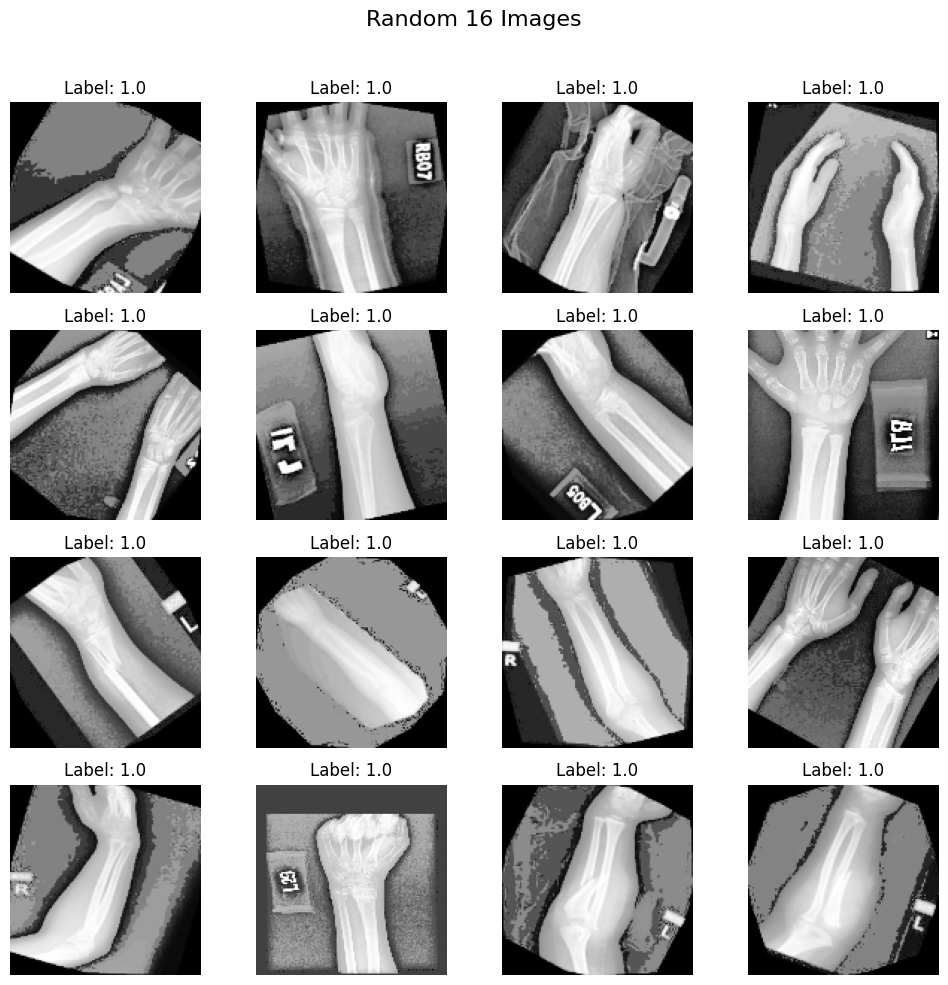

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("Random 16 Images", fontsize=16)

for i, ax in enumerate(axes.flat):
    # Assuming your DataFrame has pixel data in all columns except the last one
    img = df.iloc[i, :-1].values.reshape(128, 128)
    label = df.iloc[i, -1]
    ax.imshow(img, cmap='gray')  # grayscale
    ax.axis('off')
    ax.set_title(f"Label: {label}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
print(df.iloc[:, -1].value_counts())


16384
1.0    4840
0.0    4623
Name: count, dtype: int64


In [ ]:
import os
print(os.listdir(os.path.join(train_dir, 'not fractured')))


['46-rotated3-rotated1-rotated1-rotated1.jpg', '65-rotated2-rotated1-rotated3.jpg', '66-rotated1-rotated1-rotated3-rotated1.jpg', '44-rotated2-rotated3.jpg', '36-rotated2-rotated3-rotated2.jpg', '53-rotated3-rotated1.jpg', '40-rotated3-rotated1-rotated2-rotated1.jpg', '69.jpg', '23-rotated2-rotated3-rotated3.jpg', '45-rotated3-rotated3-rotated1.jpg', '42-rotated2-rotated1-rotated2-rotated1.jpg', '40-rotated1-rotated3-rotated3-rotated1.jpg', '46-rotated2-rotated2-rotated1.jpg', '7-rotated1-rotated3-rotated3-rotated1.jpg', '18-rotated2-rotated1-rotated1.jpg', '17-rotated3-rotated2-rotated3.jpg', '36-rotated2-rotated2-rotated2.jpg', '62-rotated3-rotated3-rotated3.jpg', '55-rotated2-rotated3-rotated2.jpg', '16-rotated3-rotated3-rotated2-rotated1.jpg', '28-rotated1-rotated3-rotated2-rotated1.jpg', '51-rotated1-rotated2-rotated2-rotated1.jpg', '44-rotated3-rotated2-rotated2.jpg', '57-rotated3-rotated3-rotated3.jpg', '59-rotated1-rotated3-rotated2-rotated1.jpg', '5-rotated2-rotated2-rotated1.

In [ ]:
#train test split
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [ ]:
max_pixel = df.iloc[:,:-1].max().max()
print("Maximum pixel value :", max_pixel)

Maximum pixel value : 1.0


In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Create CustomDataset Class
class CustomDataset(Dataset):
  def __init__(self, features, labels) :
    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)
  def __len__(self):
    return len(self.features)
  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [ ]:
#create train_dataset object
train_dataset = CustomDataset(X_train,y_train)

In [ ]:
train_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(1))

In [ ]:
#create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
test_dataset[0]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(1))

In [ ]:
#create train and test loader
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False )

In [ ]:
#define NN class
import torch
import torch.nn as nn

class myNN(nn.Module) :
   def __init__(self,num_features) :
     super().__init__()
     self.network = nn.Sequential(
        nn.Linear(num_features, 16384),
        nn.BatchNorm1d(16384),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(16384, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(1024, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(256, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 1),
        nn.Sigmoid()

         )

   def forward(self, features) :

    out = self.network(features)

    return out

In [ ]:
#parameters
learning_rate = 0.1
epochs = 60




In [ ]:
model = myNN ( X_train.shape[1])
model = model.to(device)
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= learning_rate, weight_decay = 1e-4)

In [ ]:
len(train_loader)

237

In [ ]:
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader :

    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    batch_features = batch_features.view(batch_features.size(0), -1)

    # adjust shape and type
    batch_labels = batch_labels.float().unsqueeze(1)

    #forward pass
    outputs = model(batch_features)

    #calculate loss
    loss = loss_function(outputs, batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss / len(train_loader)
  print(f'Epoch : {epoch+1}, Loss : {avg_loss}')

Epoch : 1, Loss : 0.47590949018544787
Epoch : 2, Loss : 0.27104876948056844
Epoch : 3, Loss : 0.17542666394876527
Epoch : 4, Loss : 0.1276706012146634
Epoch : 5, Loss : 0.10159045589482608
Epoch : 6, Loss : 0.086408503084416
Epoch : 7, Loss : 0.07092489615153474
Epoch : 8, Loss : 0.06743821664025637
Epoch : 9, Loss : 0.0614515315566432
Epoch : 10, Loss : 0.056808244700264576
Epoch : 11, Loss : 0.03530775436754279
Epoch : 12, Loss : 0.0438365737017527
Epoch : 13, Loss : 0.04525009915723862
Epoch : 14, Loss : 0.033301113265711925
Epoch : 15, Loss : 0.01999681487184348
Epoch : 16, Loss : 0.02176594364339926
Epoch : 17, Loss : 0.024727027333377886
Epoch : 18, Loss : 0.031622311239865634
Epoch : 19, Loss : 0.026026790232308215
Epoch : 20, Loss : 0.033552472943951916
Epoch : 21, Loss : 0.021788486974232316
Epoch : 22, Loss : 0.014069380849464266
Epoch : 23, Loss : 0.026815673511255265
Epoch : 24, Loss : 0.019084119807878698
Epoch : 25, Loss : 0.019260603552861022
Epoch : 26, Loss : 0.0161905

In [ ]:
model.eval()

myNN(
  (network): Sequential(
    (0): Linear(in_features=16384, out_features=16384, bias=True)
    (1): BatchNorm1d(16384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16384, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=1024, out_features=256, bias=True)
    (9): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=256, out_features=64, bias=True)
    (13): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.3, inplace=False)
    (16): Linear(in_features=64, out_features=1, bias=True)
    (17): Sigmoid()
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:

        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device).float().unsqueeze(1)

        outputs = model(batch_features)
        predicted = (outputs >= 0.5).float()

        # Flatten for comparison
        predicted = predicted.view(-1)
        batch_labels = batch_labels.view(-1)

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {(accuracy * 100):.2f}%')


Accuracy: 95.62%


In [ ]:
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in train_loader:

        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device).float().unsqueeze(1)

        outputs = model(batch_features)
        predicted = (outputs >= 0.5).float()

        # Flatten for comparison
        predicted = predicted.view(-1)
        batch_labels = batch_labels.view(-1)

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {(accuracy * 100):.2f}%')


Accuracy: 97.97%
